<a href="https://colab.research.google.com/github/wear-Electroniks/pyTorch_projects/blob/main/PhD__Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 2: Convolution of signals 

In [ ]:
sample = range(15)
saw = signal.sawtooth(t=sample)

data_sample = list(stock_data['SBUX'][0:100])
data_sample2 = list(stock_data['AAPL'][0:100])
x = list(range(len(data_sample)))
y_convolve = signal.convolve(saw, data_sample2)
x_convolve = list(range(len(y_convolve)))

trace1 = go.Scatter(
    x = x,
    y = data_sample,
    mode = 'lines',
    name = 'SBUX'
)

trace2 = go.Scatter(
    x = x,
    y = data_sample2,
    mode = 'lines',
    name = 'AAPL'
)

trace3 = go.Scatter(
    x = x_convolve,
    y = y_convolve,
    mode = 'lines',
    name = 'Convolution'
)

data = [trace1, trace2, trace3]
py.iplot(data, filename='convolution-of-two-signals')

NameError: ignored

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Jan 13 08:03:30 2014', '__version__': '1.0', '__globals__': [], 'reflectivity': array([[ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.4 ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [-0.3 ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.6 ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.34],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [-0.23],

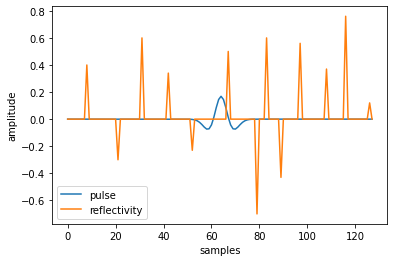

In [ ]:
import scipy.io
import matplotlib.pyplot as plt
mat = scipy.io.loadmat('/content/convolution_data.mat')

print(mat)
print(len(mat['pulse']))
print(len(mat['reflectivity']))
plt.plot(mat['pulse'])
plt.plot(mat['reflectivity'])
plt.legend(['pulse', 'reflectivity'])
plt.xlabel('samples')
plt.ylabel('amplitude')
plt.show()

In [ ]:
import numpy as np

def convolution(signal, waveLet, offset):
  co_out = [] 
  mod_signal = signal
  mod_wavLet = waveLet

  for i, j in enumerate(signal):
    if i == 0:
      n = np.sum(np.multiply(signal, waveLet))
      co_out.insert(n,i+i-2)
    else:
      mod_signal = np.insert(signal[offset+i],0)
      mod_wavLet = np.insert(wavLet[offset+i],0)
      n = np.sum(np.multiply(mod_signal[i:offset+i], wavLet))
      n1 = np.sum(np.multiply(signal, mod_wavLet[i:offset+i]))
      co_out.insert(n+n1,i+i-2)

      #print(signal[i:offset+i])
  #print(signal.shape)
  #print(signal)
  #print(type(signal))
  #print(co_out)
  return co_out

result= convolution(mat['reflectivity'],mat['pulse'], 128)
plt.plot(mat['pulse'])
plt.plot(mat['reflectivity'])
plt.legend(['pulse', 'reflectivity'])
plt.xlabel('samples')
plt.ylabel('amplitude')
plt.show()


NameError: ignored

In [ ]:
def convo(signal, waveLet):
  
  signal_L = len(signal)
  wav_L = len(waveLet)
  fog = np.zeros(wav_L)

  for i in range(signal_L):
    n = 0
    for j in range(wav_L):
      n =  n + waveLet[j:wav_L+j]*signal[i-(signal_L/2)+j:signal_L/2+j]
    fog[i] = n


  while xt<127:
    fog=fog+signal(xt)*waveLet(x-xt)*dx
    xt=xt+dx
  return(fog)

**#convolution using user-defined or custom function**

In [ ]:
import numpy as np


def conSimple(signal, waveLet):
  
  signal_L = len(signal)
  wav_L = len(waveLet)
  fog = []

  mod_signal = signal
  mod_signal = np.pad(mod_signal, (127, 127), 'constant', constant_values=0)

  for i in range(2*signal_L-1):
    n = 0
    n = np.sum(np.multiply(waveLet, mod_signal[i:signal_L+i]))
    fog.append(n)
  return fog


result = conSimple(mat['reflectivity'],mat['pulse'])

plt.plot(result)
plt.xlabel('samples')
plt.ylabel('Coefficients')
plt.show()

NameError: ignored

**#convolution using built-in function**

In [ ]:
import scipy

fx =scipy.convolve(mat['reflectivity'][:, 0],mat['pulse'][:, 0]) 
plt.plot(fx)
plt.xlabel('samples')
plt.ylabel('Coefficients')
plt.show()

NameError: ignored

Task 3: DFT


In [ ]:
def DFT(x):
   

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

#mat['reflectivity'][:, 0]

ref = DFT(mat['reflectivity'])


# calculate the frequency
N = len(ref)
n = np.arange(N)
sr = 0.05
T = N/sr    # N: 128,  sr = 128
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(ref), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.title('reflectivity')
plt.show()

pulse = DFT(mat['pulse'])


# calculate the frequency
N = len(pulse)
n = np.arange(N)
sr = 0.05
T = N/sr    # N: 128,  sr = 128
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(pulse), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.title('pulse')
plt.show()

NameError: ignored

In [ ]:
freq_conv = conSimple(ref, pulse)

plt.plot(freq_conv)
plt.xlabel('samples')
plt.ylabel('Coefficients')
plt.title('frequency_domain_Convolution')
plt.show()


NameError: ignored

compute vector of signal with different frequencies 

[array([ 0.00000000e+00,  1.13070548e-01,  2.25980417e-01,  3.38569155e-01,
        4.50676767e-01,  5.62143944e-01,  6.72812283e-01,  7.82524519e-01,
        8.91124745e-01,  9.98458634e-01,  1.10437366e+00,  1.20871931e+00,
        1.31134730e+00,  1.41211180e+00,  1.51086960e+00,  1.60748038e+00,
        1.70180685e+00,  1.79371495e+00,  1.88307408e+00,  1.96975727e+00,
        2.05364132e+00,  2.13460703e+00,  2.21253935e+00,  2.28732753e+00,
        2.35886530e+00,  2.42705098e+00,  2.49178770e+00,  2.55298345e+00,
        2.61055126e+00,  2.66440935e+00,  2.71448116e+00,  2.76069554e+00,
        2.80298683e+00,  2.84129491e+00,  2.87556537e+00,  2.90574948e+00,
        2.93180437e+00,  2.95369300e+00,  2.97138428e+00,  2.98485305e+00,
        2.99408019e+00,  2.99905257e+00,  2.99976313e+00,  2.99621087e+00,
        2.98840083e+00,  2.97634410e+00,  2.96005783e+00,  2.93956516e+00,
        2.91489520e+00,  2.88608301e+00,  2.85316955e+00,  2.81620157e+00,
        2.77523162e+00, 

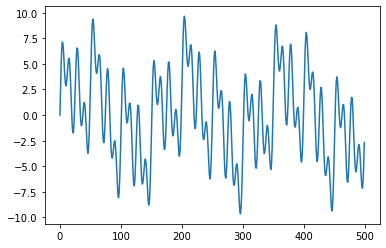

In [ ]:
def gen_sig(freq):

    sr = 500
    vec = []
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    for i in range(len(freq)):
      x = 3*np.sin(2*np.pi*freq[i]*t)
      vec.append(x)
    return vec

freq_vec = [3, 10, 20, 40]

signal_vectors = gen_sig(freq_vec)

print(signal_vectors)


n =0 
for i in range(len(signal_vectors)):
  n = n + signal_vectors[i]

plt.plot(n)


In [ ]:
# Generate frquency spectrum

sr= 254
spectrum, freqs, _ = plt.magnitude_spectrum(mat['reflectivity'][:,0], sr)
#plt.magnitude_spectrum(signalAmplitude,Fs=4)

# display the plots
plt.plot(freqs, spectrum)
plt.title('reflectivity')
plt.show()

sr= 10
spectrum, freqs, _ = plt.magnitude_spectrum(mat['pulse'][:,0], sr)
#plt.magnitude_spectrum(signalAmplitude,Fs=4)

# display the plots
plt.plot(freqs, spectrum)
plt.title('pulse')
plt.show()



output = conSimple(mat['reflectivity'],mat['pulse'])

sr= 10
spectrum, freqs, _ = plt.magnitude_spectrum(output, sr)
#plt.magnitude_spectrum(signalAmplitude,Fs=4)

# display the plots
plt.plot(freqs, spectrum)
plt.title('convolution of signals')
plt.show()

NameError: ignored

2D plot of DFT matrix

In [ ]:
N = 128
n = np.arange(N)
k = n.reshape((N, 1))
e = np.exp(-2j * np.pi * k * n / N)

plt.imshow(abs(e))
plt.colorbar()
plt.show()

In [ ]:
for i in range(len(e.real)):
  print(e.real[i])
  print(type(e.real))
  print(e.real.shape)


b =e.real.ravel()
print(type(b))
print(b.shape)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>
(128, 128)
[ 1.00000000e+00  9.98795456e-01  9.95184727e-01  9.89176510e-01
  9.80785280e-01  9.70031253e-01  9.56940336e-01  9.41544065e-01
  9.23879533e-01  9.03989293e-01  8.81921264e-01  8.57728610e-01
  8.31469612e-01  8.03207531e-01  7.73010453e-01  7.40951125e-01
  7.07106781e-01  6.71558955e-01  6.34393284e-01  5.95699304e-01
  5.55570233e-01  5.14102744e-01  4.71396737e-01  4.27555093e-01
  3.82683432e-01  3.36889853e-01  2.90284677e-01  2.42980180e-01
  1.95090322e-01  1.46730474e-01  9.80171403e-02  4.90676743e-02
  6.12323400e-17 -4.90676743e-02 -9.80171403e-02 -1.46

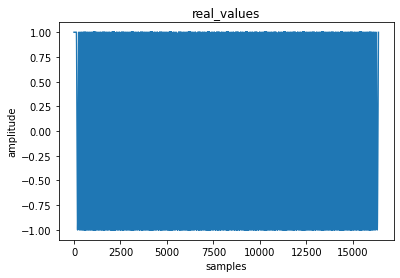

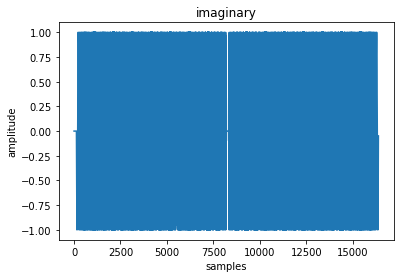

In [ ]:
reals = e.real.ravel()

plt.plot(reals)
plt.xlabel('samples')
plt.ylabel('amplitude')
plt.title('real_values')
plt.show()

imag = e.imag.ravel()
plt.plot(imag)
plt.xlabel('samples')
plt.ylabel('amplitude')
plt.title('imaginary')
plt.show()

#8: spectrogram analysis 

16000 [ 801  764  736 ... -319 -356 -389]
11369


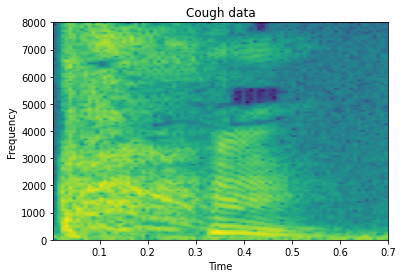

In [ ]:
import scipy
from scipy.io import wavfile
samplerate, data = wavfile.read('/content/cough_data.wav')

print(samplerate, data)
print(len(data))


powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(data, Fs=samplerate)

plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Cough data')
plt.show()  

# 4: seismic data 

In [ ]:
!pip install window_slider

  ERROR: Failed building wheel for window-slider
  Running setup.py clean for window-slider
Failed to build window-slider
    Running setup.py install for window-slider ... done


In [ ]:
'''
T = 25;                 % Window Size
K = size(data,1) - T;   % Number of repetitions

for i = 1:K    
   window = data(i:i+T-1,:);

   % Mean and Variance Calculations here
   % Plotting here
   % call 'drawnow' for incremental plotting (animation)
end
'''

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Feb 25 08:51:09 2019', '__version__': '1.0', '__globals__': [], 'seis_data': array([[-237109],
       [  27131],
       [ -30408],
       ...,
       [ 209846],
       [ 279183],
       [   4194]], dtype=int32)}
6996
7000


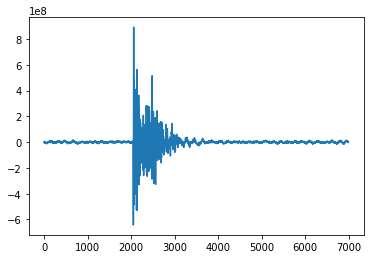

In [ ]:
seis_data = scipy.io.loadmat('/content/seis_data.mat')

print(seis_data)

def slidingWindow(winList):
  
  
  w = []
  for i in range(len(winList)):

    w.append(np.ones(i+1))
  return w


'''T = 25;                 % Window Size
K = size(data,1) - T;   % Number of repetitions

for i = 1:K    
   window = data(i:i+T-1,:);

Mean and Variance Calculations here
Plotting here
call 'drawnow' for incremental plotting (animation)
'''
windows = slidingWindow([1, 2, 3, 4, 5])

#print(windows[:][4])

def anomoly(signal, W):

  outer_list = []
  outer_max = []
  outer_mean = []
  outer_var = []
  for j in range(len(W[:][:])):
    result = []
    for i in range(len(signal)-j):
      n = np.sum(np.multiply(signal[i:i+j+1], W[:][j]))
      result.append(n)
    outer_list.append(result)
  return outer_list

final = anomoly(seis_data['seis_data'], windows)
print(len(final[:][4]))
print(len(seis_data['seis_data']))

plt.plot(final[:][4])

In [ ]:
for i in range(len(windows)):

  print(windows[:][i])

[1.]
[1. 1.]
[1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1. 1.]
